# POIs comparison: Nami vs measurements

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

tseries = pd.read_json('../tsunamilab/pois.json')
tseries

,anto,aric,buca,cald,chnr,const,coqu,huas2,iqui,meji,papo,pata,pich2,pisa,qtro,sano,talt2,toco2,valp
closestDeepPoint,"[333, 740]","[336, 1048]","[233, 82]","[307, 538]","[316, 578]","[205, 42]","[275, 364]","[284, 454]","[347, 948]","[332, 779]","[329, 658]","[344, 913]","[265, 232]","[345, 982]","[264, 193]","[260, 147]","[330, 638]","[345, 832]","[261, 180]"
closestDeepPointDepth,105,110,103,102,113,105,103.022,115,108,112,116,106,136.147,120,105.013,125,106,108,105
depth,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
location,"[-70.404441, -23.653133]","[-70.3232305, -18.4758]","[-72.046235, -34.639379]","[-70.82471944, -27.0646055]","[-70.633759, -26.351758]","[-72.457981, -35.356061]","[-71.335258, -29.950121]","[-71.223832, -28.460820000000002]","[-70.14783056, -20.20457778]","[-70.450663, -23.097712]","[-70.468728, -25.008982]","[-70.198029, -20.803213]","[-71.529306, -32.135611]","[-70.215639, -19.596907]","[-71.525427, -32.775493]","[-71.618188, -33.581625]","[-70.491683, -25.408105]","[-70.211537, -22.093748]","[-71.6259388, -33.02730833]"
originalPixel,"[335, 740]","[340, 1051]","[237, 82]","[310, 536]","[321, 578]","[212, 39]","[279, 363]","[286, 452]","[350, 947]","[332, 773]","[331, 659]","[347, 911]","[267, 232]","[346, 983]","[268, 193]","[262, 145]","[330, 635]","[346, 834]","[262, 178]"
pixel,"[333, 740]","[336, 1048]","[233, 82]","[307, 538]","[316, 578]","[205, 42]","[275, 364]","[284, 454]","[347, 948]","[332, 779]","[329, 658]","[344, 913]","[265, 232]","[345, 982]","[264, 193]","[260, 147]","[330, 638]","[345, 832]","[261, 180]"
shallowCorrectionFactor,3.20109,3.23853,3.18573,3.17797,3.26039,3.20109,3.1859,3.27472,3.22371,3.25315,3.28182,3.20868,3.41587,3.30975,3.20119,3.3437,3.20868,3.22371,3.20109
surface,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.070150531255334, 0.07013855602704701, 0.070...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.5014429345611381, 0.501450569634865, 0.5014...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.042418164287466004, 0.042424329693621005, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2.6457513760000004e-06, 7.929825404000001e..."
time,"[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055..."


In [37]:
groups = [['aric', 'pisa', 'iqui', 'pata', 'toco2', 'meji', 'anto'], 
          ['papo', 'talt2', 'chnr', 'cald', 'huas2', 'coqu'],
          ['pich2', 'qtro', 'valp', 'sano', 'buca', 'const']]

In [38]:
x0 = -76
x1 = -70
y0 = -36
y1 = -16

bathymetry = np.fromfile('../data/bathymetry',dtype='float64')[2:].reshape((1200,360))
h0 = np.loadtxt('tlab2D (27)',delimiter=',',skiprows=1).reshape((1200,360))

x = np.linspace(x0,x1, bathymetry.shape[1])
y = np.linspace(y0,y1, bathymetry.shape[0])
x, y = np.meshgrid(x, y)

[3. 8.]


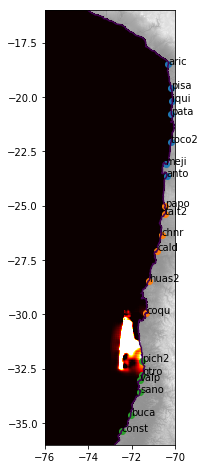

In [53]:
plt.pcolormesh(x,y,bathymetry,cmap = plt.cm.gray_r)
plt.pcolormesh(x,y,np.ma.masked_array(h0, bathymetry<0), vmax=0.2, vmin=0.0, cmap = plt.cm.hot)

plt.contour(x,y,bathymetry,[0.0])
for i in range(3):
    points = np.array([tseries[column]['location'] for column in groups[i]])
    plt.scatter(points[:,0],points[:,1])
    
for column in tseries.columns:
    plt.text(tseries[column]['location'][0],tseries[column]['location'][1],column)
plt.gca().set_aspect(1)
plt.gcf().set_size_inches((3,8))
print(plt.gcf().get_size_inches())

In [40]:
print([len(group) for group in groups])

[7, 6, 6]


# Time series plots

In [41]:
te = pd.datetime(2015, 9, 16, 22, 54, 31) #+ pd.to_timedelta('0.2 hours')
t0 = te - pd.to_timedelta('1 hour')
tf = te + pd.to_timedelta('6 hour')
print(t0,tf)

2015-09-16 21:54:31 2015-09-17 04:54:31


In [42]:
import matplotlib.dates as mdates

In [43]:
hours = mdates.HourLocator()
hoursFmt = mdates.DateFormatter('%H')

In [44]:
def plot_tserie(poi_label, ax):
    poi = pd.read_csv('2015/2015-'+poi_label+'.txt', 
                sep='\t',header=None, 
                names='year,month,day,hour,minute,second,height'.split(','))

    poi['date'] = pd.to_datetime(poi['year,month,day,hour,minute,second'.split(',')])
    
    poi = poi['date,height'.split(',')]
    time = te + pd.to_timedelta(tseries[poi_label]['time'], unit='s') + pd.to_timedelta('10 minutes')

    ax.plot(poi['date'],  poi['height'],lw=0.8)
    ax.plot(time, tseries[poi_label]['surface'],lw=0.8)
    ax.set_xlim([t0,tf])
    ax.set_ylim([np.array(tseries[poi_label]['surface']).min()*1.5, 
                 np.array(tseries[poi_label]['surface']).max()*1.5] )
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hoursFmt)
    ax.set_title(poi_label)
#     ax.xaxis.set_minor_locator(months)

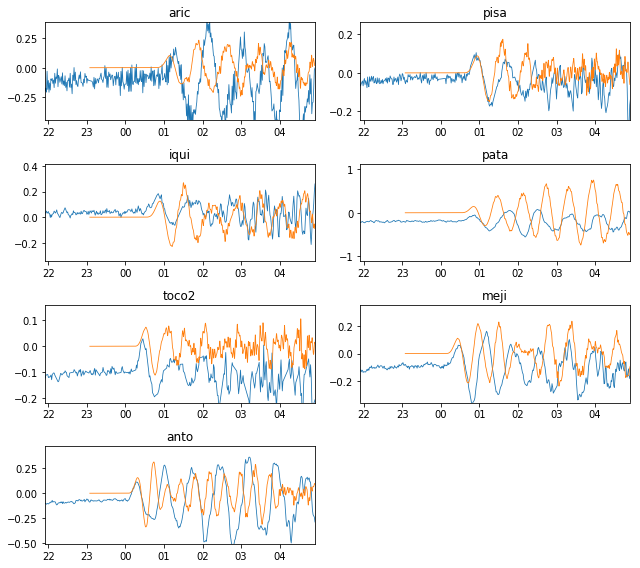

In [45]:
f = plt.figure(figsize=(6*1.5,4*2))
for i,poi_label in enumerate(groups[0]):
    ax = f.add_subplot(4,2,i+1)   
    plot_tserie(poi_label, ax)
#     ax.set_axis_off()
f.tight_layout()

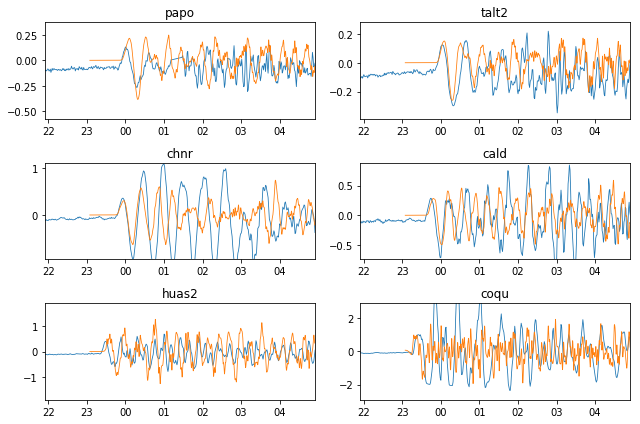

In [46]:
f = plt.figure(figsize=(6*1.5,4*1.5))
for i,poi_label in enumerate(groups[1]):
    ax = f.add_subplot(3,2,i+1)   
    plot_tserie(poi_label, ax)
#     ax.set_axis_off()
f.tight_layout()

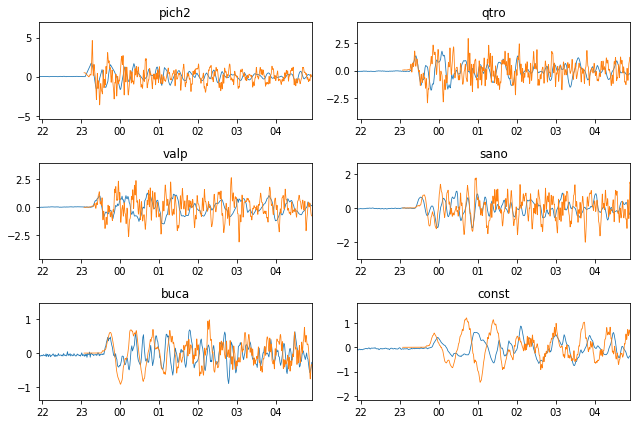

In [47]:
f = plt.figure(figsize=(6*1.5,4*1.5))
for i,poi_label in enumerate(groups[2]):
    ax = f.add_subplot(3,2,i+1)   
    plot_tserie(poi_label, ax)
#     ax.set_axis_off()
f.tight_layout()